<img style="float: right;" src="https://upload.wikimedia.org/wikipedia/commons/f/f5/Best_Buy_Logo.svg" alt="bb logo" width="100"/>

<h1><FONT COLOR=#0000E5>BESTBUY </FONT COLOR=#195071>Televisions</h1>

## 📉 Data Analysis

In [1]:
import numpy as np
import pandas as pd
import re

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
bb = pd.read_csv('python_proj\\bb_clean.csv')
bb = bb.set_index('sku')

In [4]:
bb.columns
#bb.groupby('smart_capable').agg('count')

Index(['color', 'curved', 'display_type', 'energy_KWh', 'height_nostand',
       'manufacturer', 'model_num', 'model_year', 'online_avail', 'refresh_Hz',
       'regular_px', 'resolution', 'review_average', 'review_count', 'sale_px',
       'size_class', 'screen_size', 'smart_capable', 'store_avail',
       'sub_class', 'top_class', 'tv_name', 'warranty_yrs', 'weight_nostand',
       'width', 'bezel'],
      dtype='object')

<h2>Basic Market Proportions with <FONT COLOR=#FF0000>Pie Charts</FONT COLOR=#FF0000></h2>

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
%matplotlib inline

In [7]:
pie_type = bb['display_type'].value_counts().to_frame().T
pie_size = bb['size_class'].value_counts().to_frame().T
pie_curv = bb['curved'].value_counts().to_frame().T
pie_rfsh = bb['refresh_Hz'].value_counts().to_frame().T
pie_smrt = bb['smart_capable'].value_counts().to_frame().T
pie_warr = bb['warranty_yrs'].value_counts().to_frame().T

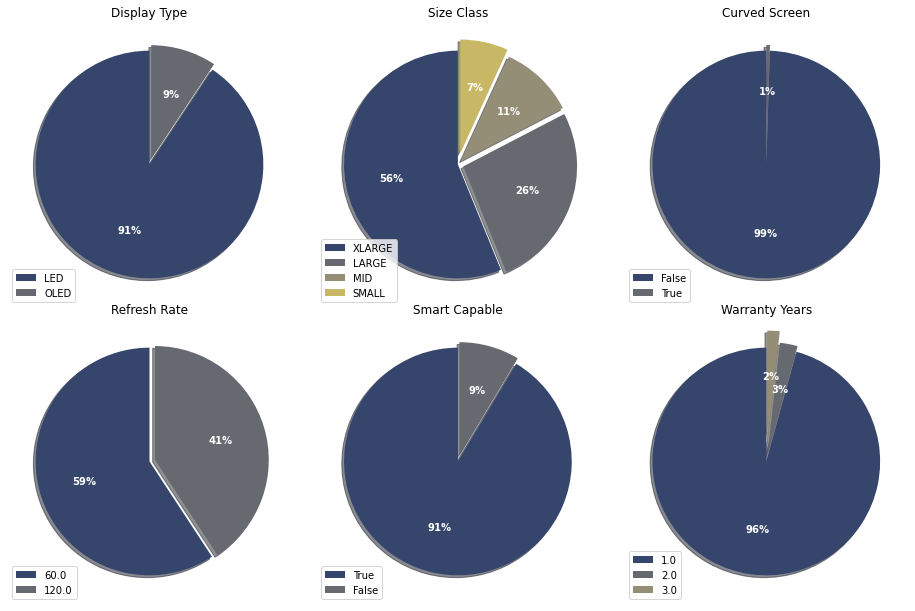

In [91]:
fig, ax = plt.subplots(nrows=2, ncols=3)
n_plots = 3
sns.set_palette(sns.color_palette("cividis", n_plots), n_plots)

explode2 = (0, 0.05)
explode3 = (0, 0.05, 0.15)
explode4 = (0, 0.05, 0.05, 0.1)

plt.title('TV market Proportions')
plt.tight_layout()

# Chart Contents
ax[0,0].pie(pie_type.iloc[0], startangle=90, textprops=dict(color="w",fontweight='extra bold'),
            autopct='%1.f%%', explode=explode2, shadow=True)
ax[0,0].set_title('Display Type', fontweight='light')
ax[0,1].pie(pie_size.iloc[0], startangle=90, textprops=dict(color="w",fontweight='extra bold'), 
            autopct='%1.f%%', explode=explode4, shadow=True)
ax[0,1].set_title('Size Class', fontweight='light')
ax[0,2].pie(pie_curv.iloc[0], startangle=90, textprops=dict(color="w",fontweight='extra bold'), 
            autopct='%1.f%%', explode=explode2, shadow=True)
ax[0,2].set_title('Curved Screen', fontweight='light')
ax[1,0].pie(pie_rfsh.iloc[0], startangle=90, textprops=dict(color="w",fontweight='extra bold'), 
            autopct='%1.f%%', explode=explode2, shadow=True)
ax[1,0].set_title('Refresh Rate', fontweight='light')
ax[1,1].pie(pie_smrt.iloc[0], startangle=90, textprops=dict(color="w",fontweight='extra bold'), 
            autopct='%1.f%%', explode=explode2, shadow=True)
ax[1,1].set_title('Smart Capable', fontweight='light')
ax[1,2].pie(pie_warr.iloc[0], startangle=90, textprops=dict(color="w",fontweight='extra bold'), 
            autopct='%1.f%%', explode=explode3, shadow=True)
ax[1,2].set_title('Warranty Years', fontweight='light')

# Chart Labels
ax[0,0].legend(loc=3, labels=pie_type.columns, fontsize='medium')
ax[0,1].legend(loc=3, labels=pie_size.columns, fontsize='medium')
ax[0,2].legend(loc=3, labels=pie_curv.columns, fontsize='medium')
ax[1,0].legend(loc=3, labels=pie_rfsh.columns, fontsize='medium')
ax[1,1].legend(loc=3, labels=pie_smrt.columns, fontsize='medium')
ax[1,2].legend(loc=3, labels=pie_warr.columns, fontsize='medium')

#fig.suptitle('The TV market', fontsize=18, y=1, fontweight='normal', x=0.1)
fig.set_figheight(8.5)
fig.set_figwidth(13)

fig.tight_layout()

#fig.savefig('xxx')

plt.show()

<h2>Brand product share segmented by <FONT COLOR=#FF0000>Screen Size</FONT COLOR=#FF0000></h2>

- The query below shows total # of products sold by each brand

In [9]:
bb.groupby(['manufacturer']).agg('count')['tv_name'].sort_values(ascending=False)

manufacturer
Samsung      115
LG            83
Sony          49
Others        39
TCL           33
VIZIO         30
Hisense       25
Insignia™     23
Name: tv_name, dtype: int64

### Total product percentages

In [144]:
# calculate product # percentages

brands_lvl01 = bb[['manufacturer']].copy()
brands_lvl01 = brands_lvl01['manufacturer'].value_counts(normalize=True).to_frame()
brands_lvl01.rename(columns={'manufacturer': 'manuf_ALL'}, inplace=True)
brands_lvl01

,manuf_ALL
Samsung,0.289673
LG,0.209068
Sony,0.123426
Others,0.098237
TCL,0.083123
VIZIO,0.075567
Hisense,0.062972
Insignia™,0.057935


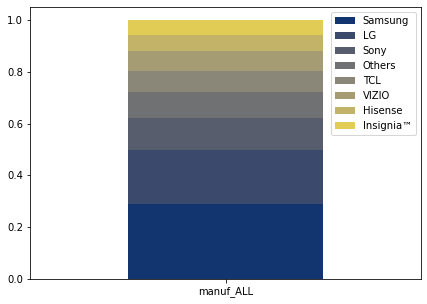

In [155]:
#SET sns.color_palette()
n_plots = 8
sns.set_palette(sns.color_palette("cividis", n_plots), n_plots)
#sns.set_palette(reversed(sns.color_palette("cividis", n_plots)), n_plots)

brands_lvl01.T.plot(kind='bar', rot=0, stacked=True, figsize=(7,5))
plt.legend(bbox_to_anchor=(1.0, 1.0))

### Size class segmented percentages
- The below calculates product percentages split by "size_class" and merges onto previous DF

In [147]:
brands_bysize = bb[['size_class','manufacturer']].copy()

brands_lvl02 = brands_lvl01.merge(brands_bysize.groupby('size_class')['manufacturer'].value_counts(normalize=True)\
                                  .loc['XLARGE'].to_frame(), how='left', left_index=True, right_index=True)
brands_lvl02.rename(columns={'manufacturer': 'manuf_XLARGE'}, inplace=True)

brands_lvl02 = brands_lvl02.merge(brands_bysize.groupby('size_class')['manufacturer'].value_counts(normalize=True)\
                                  .loc['LARGE'].to_frame(), how='left', left_index=True, right_index=True)
brands_lvl02.rename(columns={'manufacturer': 'manuf_LARGE'}, inplace=True)

brands_lvl02 = brands_lvl02.merge(brands_bysize.groupby('size_class')['manufacturer'].value_counts(normalize=True)\
                                  .loc['MID'].to_frame(), how='left', left_index=True, right_index=True)
brands_lvl02.rename(columns={'manufacturer': 'manuf_MID'}, inplace=True)

brands_lvl02 = brands_lvl02.merge(brands_bysize.groupby('size_class')['manufacturer'].value_counts(normalize=True)\
                                  .loc['SMALL'].to_frame(), how='left', left_index=True, right_index=True)
brands_lvl02.rename(columns={'manufacturer': 'manuf_SMALL'}, inplace=True)

In [148]:
brands_lvl02

,manuf_ALL,manuf_XLARGE,manuf_LARGE,manuf_MID,manuf_SMALL
Samsung,0.289673,0.345291,0.238095,0.238095,0.111111
LG,0.209068,0.246637,0.190476,0.095238,0.148148
Sony,0.123426,0.143498,0.133333,0.071429,NaN
Others,0.098237,0.040359,0.161905,0.238095,0.111111
TCL,0.083123,0.071749,0.095238,0.095238,0.111111
VIZIO,0.075567,0.076233,0.057143,0.047619,0.185185
Hisense,0.062972,0.058296,0.066667,0.071429,0.074074
Insignia™,0.057935,0.017937,0.057143,0.142857,0.259259


In [138]:
# brands_lvl02.T.plot(kind='bar', rot=0, stacked=True, figsize=(7,5))
# plt.legend(bbox_to_anchor=(1.0, 1.0))
# plt.show()

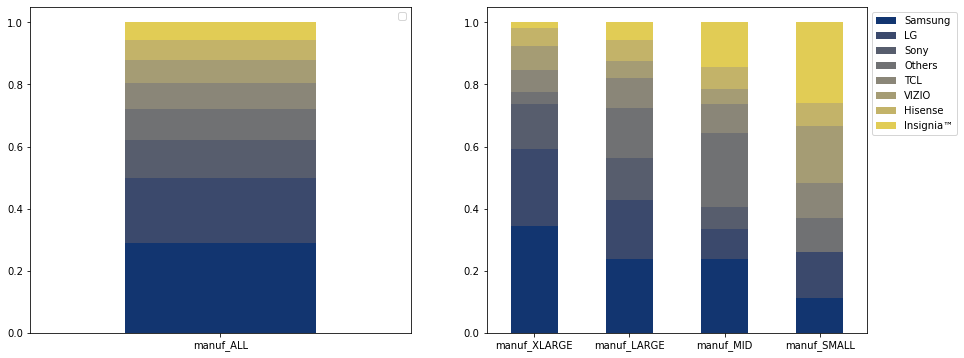

In [156]:
#sns.color_palette()
n_plots = 8

sns.set_palette(sns.color_palette("cividis", n_plots), n_plots)
#sns.set_palette(reversed(sns.color_palette("cividis", n_plots)), n_plots)

fig, axes = plt.subplots(figsize=(15, 6), nrows=1, ncols=2)
brands_lvl02[['manuf_ALL']].T.plot(ax=axes[0], kind='bar', rot=0, stacked=True).legend('')
brands_lvl02[['manuf_XLARGE','manuf_LARGE','manuf_MID','manuf_SMALL']].T\
            .plot(ax=axes[1], kind='bar', rot=0, stacked=True).legend(bbox_to_anchor=(1.0, 1.0))

In [116]:
brands_bysize.groupby('size_class')['manufacturer'].value_counts().loc['MID']

manufacturer
Others       10
Samsung      10
Insignia™     6
LG            4
TCL           4
Hisense       3
Sony          3
VIZIO         2
Name: manufacturer, dtype: int64

<h2>What can we say about <FONT COLOR=#FF0000>Sales</FONT COLOR=#FF0000> &
    <FONT COLOR=#FF0000>Marketshare</FONT COLOR=#FF0000>?</h2>

In [158]:
bb.groupby(['manufacturer']).agg('sum')['review_count'].sort_values(ascending=False)

manufacturer
Samsung      71207.0
Insignia™    32355.0
LG           29598.0
Sony         23204.0
TCL          22254.0
Others       10928.0
VIZIO        10524.0
Hisense       6095.0
Name: review_count, dtype: float64

Unfortunately we can't scrape sales data, so lets use "review counts" as a proxy<br> 
&emsp; (as most bestbuy reviews have "verified purchase" marks)
- create a new column as **"revcount_pp"**, showing the avg review count per product for each manufacturer

In [185]:
revs_lvl01 = bb.groupby('manufacturer').agg('count')['tv_name'].to_frame()

In [186]:
revs_lvl01 = revs_lvl01.merge(bb.groupby(['manufacturer']).agg('sum')['review_count'].to_frame(),
                              how='left', left_index=True, right_index=True)

In [192]:
revs_lvl01['revcount_pp'] = round(revs_lvl01.review_count / revs_lvl01.tv_name,2)

In [193]:
revs_lvl01

,tv_name,review_count,revcount_pp
manufacturer,,,
Hisense,25,6095.0,243.80
Insignia™,23,32355.0,1406.74
LG,83,29598.0,356.60
Others,39,10928.0,280.21
Samsung,115,71207.0,619.19
Sony,49,23204.0,473.55
TCL,33,22254.0,674.36
VIZIO,30,10524.0,350.80
